## Data procesing


check age and gender distribution and the amount of images.



###wiki + IMDB 22,138 + 93,411 = 115,549

In [0]:
cp ./drive/'My Drive'/Test_DATA/imdb_crop.tar ./

In [0]:
!tar -xf imdb_crop.tar

In [0]:
import scipy.io
import os
import pandas as pd
import numpy as np
import cv2
from datetime import datetime

from numpy import asarray
from PIL import Image


mat = scipy.io.loadmat('./imdb_crop/imdb.mat')

instances = mat['imdb'][0][0][0].shape[1]
columns = ['dob', 'photo_taken', 'full_path', 'gender', "name", "face_location", "face_score", "second_face_score"]
df = pd.DataFrame(index=range(0, instances), columns=columns)
for i in mat:
  if i == "imdb":
    curr_array = mat[i][0][0]
    print(len(curr_array))
    for j in range(0, len(curr_array)-2): #imdb has 10 columns
      df[columns[j]] = pd.DataFrame(curr_array[j][0])

10


In [0]:
def cale_age(taken, dob):
  
  birth = datetime.fromordinal(max(int(dob) - 366,1))
  
  if birth.month < 7:
    return taken - birth.year
  else:
    return taken - birth.year - 1

df['age'] = [cale_age(df['photo_taken'][i], df['dob'][i]) for i in range(len(df['dob']))]

In [0]:
#clean data
#remove no face picture
df = df[df['face_score'] != -np.inf]
#remove more faces in one picuture
df = df[df['second_face_score'].isna()]
#threshold more than 3
df = df[df['face_score'] >= 3]
#remove no gender
df = df[df['gender'].isna()==False]
#reomve unuse columns
df = df.drop(columns=['name', 'face_score', 'second_face_score', 'face_location'])


In [0]:
df.head()

(93411, 5)

In [0]:
df = df[df['age']>0]
df = df[df['age']<=100]

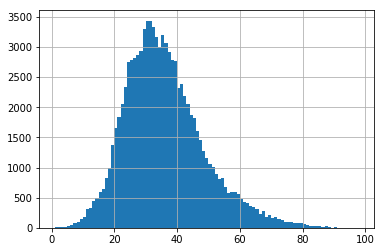

In [0]:
series = pd.Series(np.random.normal(size=2000))
#check age distribution 
age_histo = df['age'].hist(bins=df['age'].nunique())

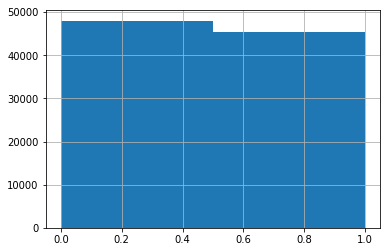

In [0]:
gender_histo = df['gender'].hist(bins=df['gender'].nunique())

In [0]:
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
target_size = (224,224)
#update to pixel value
def getImagetoPixels(image_path):
  image = cv2.imread('imdb_crop/{}'.format(image_path[0]), cv2.IMREAD_COLOR)
  image = cv2.resize(image,target_size)
  return image.reshape(1,-1)[0]

In [0]:
# image = cv2.imread('./wiki_crop/00/10049200_1891-09-16_1958.jpg', cv2.IMREAD_COLOR)
# image = cv2.resize(image,target_size)
# image = getImagetoPixels(['00/10049200_1891-09-16_1958.jpg'])
# image.reshape(1,-1)[0]
df['pixels'] = df['full_path'].apply(getImagetoPixels)

###UTKFace  (23,706)

In [0]:
cp ./drive/'My Drive'/Test_DATA/UTKFace.zip ./

In [0]:
!unzip UTKFace.zip

In [0]:
import os
file_path = 'UTKFace/UTKFace'
num_UTKFace = len(os.listdir(file_path))

In [0]:
print(os.listdir(file_path)[0])

8_1_0_20170109204910999.jpg.chip.jpg


In [0]:
df_utkface = pd.DataFrame(index=range(0, num_UTKFace), columns=['age', 'gender','filename'])

In [0]:
age = []
gender = []
filename = []
for i in range(0, num_UTKFace):
  name = os.listdir(file_path)[i]
  filename.append(name)
  #content
  list = name.split('_')
  if(len(list) != 0):
    age.append(int(list[0]))
    gender.append(int(list[1]))

In [0]:
df_utkface['age'] = pd.DataFrame(age)
df_utkface['gender'] = pd.DataFrame(gender)
df_utkface['filename'] = pd.DataFrame(filename)

In [0]:
df_utkface.head()

,age,gender,filename
0,8,1,8_1_0_20170109204910999.jpg.chip.jpg
1,21,0,21_0_2_20170116170638620.jpg.chip.jpg
2,21,0,21_0_2_20170116170907317.jpg.chip.jpg
3,26,1,26_1_3_20170119193112441.jpg.chip.jpg
4,30,1,30_1_1_20170117133936142.jpg.chip.jpg


In [0]:
df_utkface = df_utkface[df_utkface['age']>0]
df_utkface = df_utkface[df_utkface['age']<=100]

In [0]:
df_utkface.shape

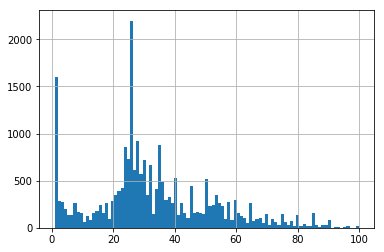

In [0]:
utkface_age_hist = df_utkface['age'].hist(bins=df['age'].nunique())

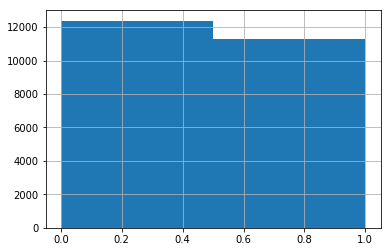

In [0]:
gender_hist = df_utkface['gender'].hist(bins=df['gender'].nunique())

###CACD2000  -- no gender labels  (163,446)

In [0]:
cp -r ./drive/'My Drive'/Test_DATA/training_CACD_align.zip ./

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip training_CACD_align.zip -d ./

In [0]:
import os
file_path = 'training_CACD_align'
num_CACD = len(os.listdir(file_path))
num_CACD

160285

In [0]:
os.listdir(file_path)[0]

'53_Sam_J._Jones_0015.jpg'

In [0]:
import pandas as pd
df_cacd = pd.DataFrame(index=range(0, num_CACD), columns=['age','filename'])

In [0]:
age = []
filename = []
for i in range(0, num_CACD):
  name = os.listdir(file_path)[i]
  filename.append(name)
  #content
  list = name.split('_')
  if(len(list) != 0):
    age.append(int(list[0]))
  if i%1000==0:
    print(len(age))

In [7]:
len(age)

160285

In [0]:
df_cacd['age'] = pd.DataFrame(age)
df_cacd['filename'] = pd.DataFrame(filename)

In [0]:
df_cacd = df_cacd[df_cacd['age']>0]
df_cacd = df_cacd[df_cacd['age']<=100]

In [10]:
df_cacd.head()

,age,filename
0,21,21_Freida_Pinto_0016.jpg
1,47,47_Viola_Davis_0003.jpg
2,26,26_Emily_Blunt_0009.jpg
3,37,37_Tiffani_Thiessen_0011.jpg
4,55,55_David_Hasselhoff_0008.jpg


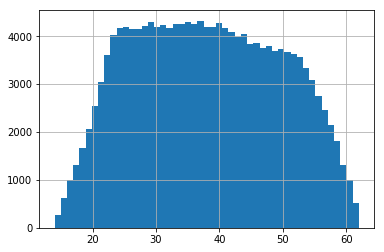

In [11]:
cacd_gender_hist = df_cacd['age'].hist(bins=df_cacd['age'].nunique())